github: [ptonso](https://github.com/ptonso)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('data/iris-with-errors.csv', header=(0))
print(iris.to_markdown())

|    | sepal_length   | sepal_width   |   petal_length | petal_width   | species   |
|---:|:---------------|:--------------|---------------:|:--------------|:----------|
|  0 | 5.1            | 3.5           |            1.4 | 0.2           | duplicada |
|  1 | 5.1            | 3.5           |            1.4 | 0.2           | duplicada |
|  2 | ?              | 3             |            1.4 | 0.2           | setosa    |
|  3 | 4.7            | 3.2           |            1.3 | 0.2           | setosa    |
|  4 | 5.1            | 3.5           |            1.4 | 0.2           | duplicada |
|  5 | nan            | 3.1           |            1.5 | 0.2           | setosa    |
|  6 | 5              | 3.6           |            1.4 | 0.2           | setosa    |
|  7 | 5.4            | 3.9           |            1.7 | 0.4           | duplicada |
|  8 | 5.4            | 3.9           |            1.7 | 0.4           | duplicada |
|  9 | 4.6            | 3.4           |            1.4 | nan     

In [3]:
iris = iris.replace('?', np.nan)
float_columns = iris.columns[:4]
iris[float_columns] = iris[float_columns].astype(np.float64)
iris = iris.drop_duplicates()


print(iris.dtypes)
print(iris.to_markdown())

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | duplicada |
|  2 |          nan   |           3   |            1.4 |           0.2 | setosa    |
|  3 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  5 |          nan   |           3.1 |            1.5 |           0.2 | setosa    |
|  6 |            5   |           3.6 |            1.4 |           0.2 | setosa    |
|  7 |            5.4 |           3.9 |            1.7 |           0.4 | duplicada |
|  9 |            4.6 |           3.4 |            1.4 |         nan   | setosa    |
| 10 |            5   |           3.4 |            1.5 |           0.2 | setosa    |
| 11 |          

In [4]:
irisq1 = iris.dropna()
irisq1 = irisq1.iloc[:, :-2]
print(irisq1.shape)

(14, 3)


In [5]:
def fill_na_with_mean(column):
    column = column.fillna(column.mean())
    return column

irisq2 = iris[float_columns].apply(fill_na_with_mean, axis=0)

median_values = irisq2.median().tolist()
print(median_values)

[5.064705882352942, 3.431578947368421, 1.4, 0.2]


In [6]:
print(irisq2.to_markdown())

|    |   sepal_length |   sepal_width |   petal_length |   petal_width |
|---:|---------------:|--------------:|---------------:|--------------:|
|  0 |        5.1     |       3.5     |            1.4 |      0.2      |
|  2 |        5.06471 |       3       |            1.4 |      0.2      |
|  3 |        4.7     |       3.2     |            1.3 |      0.2      |
|  5 |        5.06471 |       3.1     |            1.5 |      0.2      |
|  6 |        5       |       3.6     |            1.4 |      0.2      |
|  7 |        5.4     |       3.9     |            1.7 |      0.4      |
|  9 |        4.6     |       3.4     |            1.4 |      0.222222 |
| 10 |        5       |       3.4     |            1.5 |      0.2      |
| 11 |        4.4     |       2.9     |            1.4 |      0.2      |
| 12 |        4.9     |       3.1     |            1.5 |      0.1      |
| 13 |        5.4     |       3.7     |            1.5 |      0.2      |
| 15 |        4.8     |       3.4     |            

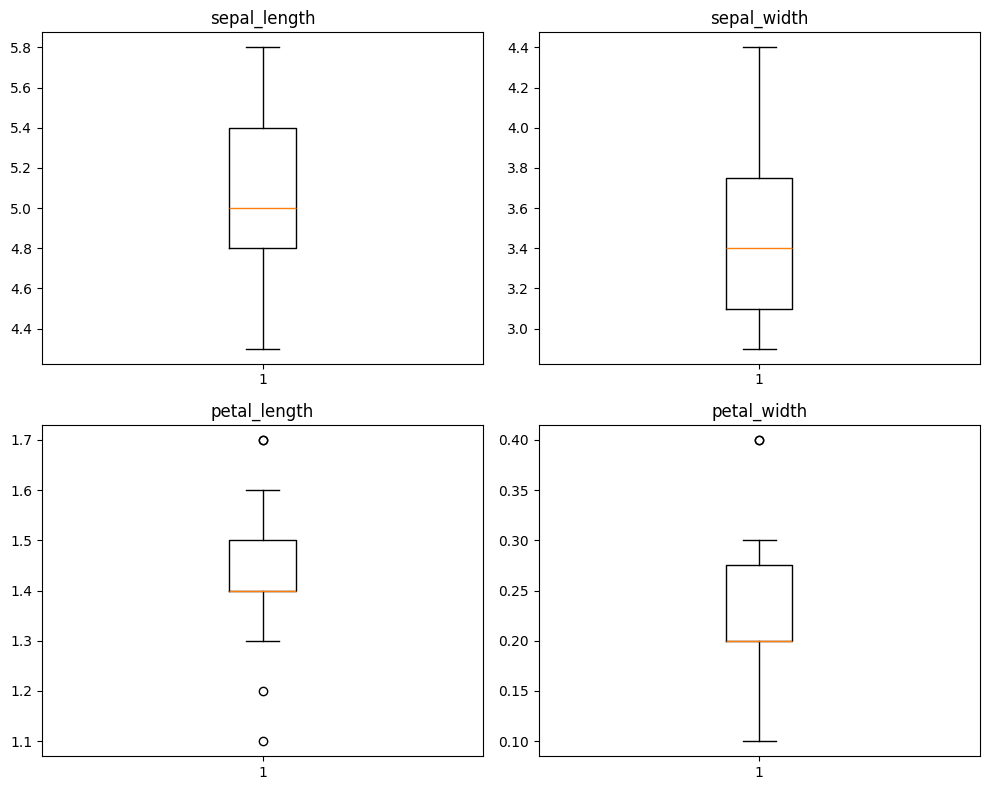

In [7]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(float_columns[:4]):
    plt.subplot(2, 2, i+1)
#     plt.boxplot(irisq2[col])
    plt.boxplot(iris[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

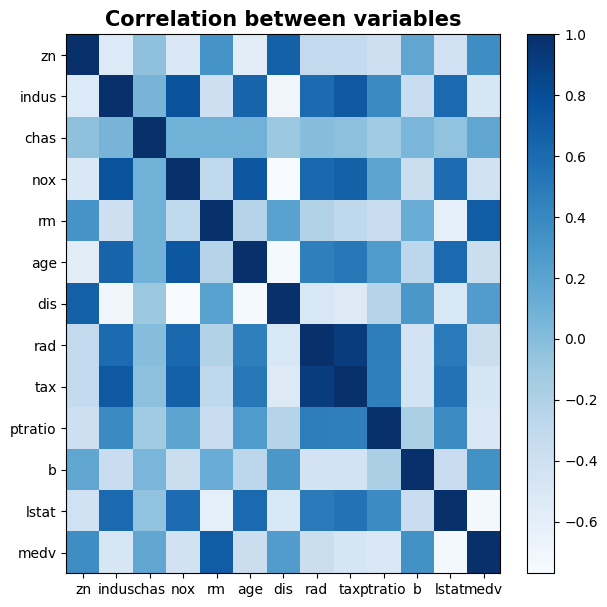

0.9102281885331865
[('rad', 'tax'), ('tax', 'rad')]


In [18]:
ad = pd.read_csv('data/BostonHousing.csv', index_col=0)

corr = ad.corr()
plt.figure(figsize=(7,7))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()


corr_abs = corr.abs()
for i in range(len(corr_abs)):
    corr_abs.iloc[i,i] = 0

max_corr = corr_abs.max().max()
print(max_corr)

max_corr_pairs = corr_abs[corr_abs == max_corr].stack().index.tolist()
print(max_corr_pairs)